## 1. Customer Segmentation

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [31]:
df = pd.read_csv("subscribers.csv")
df

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [32]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
temp = pd.read_pickle('engagement')
temp
engagement = pd.pivot_table(temp, index = ['subid'],
                            values = ['app_opens','cust_service_mssgs',
                                      'num_videos_completed',
                                      'num_videos_more_than_30_seconds',
                                      'num_videos_rated','num_series_started'
                                     ],aggfunc= 'sum')
engagement

,app_opens,cust_service_mssgs,num_series_started,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated
subid,,,,,,
20000062,4.0,3.0,1.0,6.0,23.0,0.0
20000405,5.0,4.0,1.0,13.0,17.0,0.0
20000604,14.0,5.0,1.0,8.0,68.0,0.0
20000685,46.0,10.0,8.0,14.0,165.0,0.0
20000741,1.0,1.0,0.0,2.0,7.0,0.0
...,...,...,...,...,...,...
29999740,15.0,3.0,0.0,11.0,31.0,0.0
29999820,12.0,6.0,7.0,22.0,50.0,0.0
29999822,5.0,4.0,1.0,2.0,25.0,0.0


In [34]:
df_merge = pd.merge(df,engagement,on ='subid')
df_merge

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,last_payment,next_payment,cancel_date,trial_completed,app_opens,cust_service_mssgs,num_series_started,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated
0,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,NaN,NaN,NaN,True,2.0,2.0,1.0,13.0,13.0,0.0
1,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,...,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True,40.0,17.0,39.0,182.0,182.0,6.0
2,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,...,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True,104.0,10.0,29.0,84.0,206.0,0.0
3,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,...,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True,3.0,3.0,0.0,2.0,13.0,0.0
4,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,24.0,True,UAE,...,2019-12-15 07:29:14,2020-04-15 07:29:14,NaN,True,4.0,3.0,0.0,2.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,NaN,drama,replace OTT,NaN,NaN,NaN,False,UAE,...,NaN,NaN,NaN,True,50.0,16.0,22.0,92.0,176.0,3.0
135015,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,61.0,False,UAE,...,2020-03-20 02:57:03,2020-07-20 02:57:03,NaN,True,1.0,2.0,0.0,0.0,6.0,0.0
135016,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,...,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True,31.0,5.0,8.0,47.0,59.0,0.0
135017,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,...,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,16.0,3.0,2.0,20.0,36.0,0.0


In [35]:
# age,gender,interests, buying stage,

In [36]:
df_seg = df_merge.drop(columns = ['subid','package_type','op_sys',
                                  'num_weekly_services_utilized','intended_use',
                                  'num_ideal_streaming_services','country',
                                  'attribution_technical', 'attribution_survey',
                                  'months_per_bill_period','plan_type',
                                  'monthly_price','discount_price', 
                                  'account_creation_date', 'trial_end_date',
                                  'initial_credit_card_declined', 'join_fee', 
                                  'language','payment_type','num_trial_days', 
                                  'current_sub_TF','last_payment','next_payment', 
                                  'cancel_date', 'trial_completed',
                                  'num_videos_more_than_30_seconds',
                                  'cust_service_mssgs',
                                  'num_videos_rated','num_videos_completed','preferred_genre'
                                 ])
df_seg

,weekly_consumption_hour,age,male_TF,payment_period,app_opens,num_series_started
0,36.001186,25.0,True,0,2.0,1.0
1,20.051667,61.0,False,1,40.0,39.0
2,34.551230,23.0,False,1,104.0,29.0
3,25.851492,73.0,False,1,3.0,0.0
4,37.451142,24.0,True,1,4.0,0.0
...,...,...,...,...,...,...
135014,NaN,NaN,False,0,50.0,22.0
135015,28.751405,61.0,False,1,1.0,0.0
135016,24.401536,43.0,False,1,31.0,8.0
135017,28.751405,38.0,False,1,16.0,2.0


In [37]:
trial_user = []
for period in df_seg['payment_period']:
    if period == 0:
        trial_user.append(1)
    else:
        trial_user.append(0)
df_seg['trial_user'] = trial_user
df_seg.drop('payment_period',axis=1 ,inplace = True)
df_seg

,weekly_consumption_hour,age,male_TF,app_opens,num_series_started,trial_user
0,36.001186,25.0,True,2.0,1.0,1
1,20.051667,61.0,False,40.0,39.0,0
2,34.551230,23.0,False,104.0,29.0,0
3,25.851492,73.0,False,3.0,0.0,0
4,37.451142,24.0,True,4.0,0.0,0
...,...,...,...,...,...,...
135014,NaN,NaN,False,50.0,22.0,1
135015,28.751405,61.0,False,1.0,0.0,0
135016,24.401536,43.0,False,31.0,8.0,0
135017,28.751405,38.0,False,16.0,2.0,0


In [38]:
segmentation = pd.get_dummies(df_seg, columns = ['male_TF','trial_user'
                                                 ],
                              dummy_na = False)
segmentation

,weekly_consumption_hour,age,app_opens,num_series_started,male_TF_False,male_TF_True,trial_user_0,trial_user_1
0,36.001186,25.0,2.0,1.0,0,1,0,1
1,20.051667,61.0,40.0,39.0,1,0,1,0
2,34.551230,23.0,104.0,29.0,1,0,1,0
3,25.851492,73.0,3.0,0.0,1,0,1,0
4,37.451142,24.0,4.0,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...
135014,NaN,NaN,50.0,22.0,1,0,0,1
135015,28.751405,61.0,1.0,0.0,1,0,1,0
135016,24.401536,43.0,31.0,8.0,1,0,1,0
135017,28.751405,38.0,16.0,2.0,1,0,1,0


In [39]:
segmentation.drop(columns = ['male_TF_True','trial_user_0'], axis=1, inplace=True)
segmentation = segmentation.rename(columns = {'male_TF_False':'Female'})
segmentation = segmentation.rename(columns = {'trial_user_1':'trial_user'})

In [40]:
segmentation

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,36.001186,25.0,2.0,1.0,0,1
1,20.051667,61.0,40.0,39.0,1,0
2,34.551230,23.0,104.0,29.0,1,0
3,25.851492,73.0,3.0,0.0,1,0
4,37.451142,24.0,4.0,0.0,0,0
...,...,...,...,...,...,...
135014,NaN,NaN,50.0,22.0,1,1
135015,28.751405,61.0,1.0,0.0,1,0
135016,24.401536,43.0,31.0,8.0,1,0
135017,28.751405,38.0,16.0,2.0,1,0


In [41]:
def age_correct(num):
    if (num > 1921) & (num < 2021):
        return (2021-num)
    elif (num < 0) |((num > 100)&(num < 1921))|(num > 2021):
        return (float('NaN'))
    else:
        return (num)

In [42]:
def hour_correct(num):
    if (num < 0):
        return (float('NaN'))
    else:
        return (num)

In [43]:
segmentation['age'] = segmentation['age'].apply(age_correct)
segmentation['weekly_consumption_hour'] = segmentation['weekly_consumption_hour'].apply(hour_correct)

In [44]:
segmentation

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,36.001186,25.0,2.0,1.0,0,1
1,20.051667,61.0,40.0,39.0,1,0
2,34.551230,23.0,104.0,29.0,1,0
3,25.851492,73.0,3.0,0.0,1,0
4,37.451142,24.0,4.0,0.0,0,0
...,...,...,...,...,...,...
135014,NaN,NaN,50.0,22.0,1,1
135015,28.751405,61.0,1.0,0.0,1,0
135016,24.401536,43.0,31.0,8.0,1,0
135017,28.751405,38.0,16.0,2.0,1,0


In [45]:
col_names = ['weekly_consumption_hour','age','app_opens',
             'num_series_started']
features = segmentation[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,weekly_consumption_hour,age,app_opens,num_series_started
0,1.671584,-1.521216,-0.533580,-0.643148
1,-1.645131,1.112143,-0.032555,1.399858
2,1.370065,-1.667514,0.811275,0.862225
3,-0.439053,1.989929,-0.520395,-0.696912
4,1.973104,-1.594365,-0.507210,-0.696912


In [46]:
segmentation.columns

Index(['weekly_consumption_hour', 'age', 'app_opens', 'num_series_started',
       'Female', 'trial_user'],
      dtype='object')

In [47]:
newdf = scaled_features.join([segmentation.Female,
                              segmentation.trial_user
                             ])

In [48]:
newdf

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,1.671584,-1.521216,-0.533580,-0.643148,0,1
1,-1.645131,1.112143,-0.032555,1.399858,1,0
2,1.370065,-1.667514,0.811275,0.862225,1,0
3,-0.439053,1.989929,-0.520395,-0.696912,1,0
4,1.973104,-1.594365,-0.507210,-0.696912,0,0
...,...,...,...,...,...,...
135014,NaN,NaN,0.099293,0.485882,1,1
135015,0.163987,1.112143,-0.546765,-0.696912,1,0
135016,-0.740572,-0.204536,-0.151219,-0.266805,1,0
135017,0.163987,-0.570281,-0.348992,-0.589385,1,0


In [49]:
newdf.dropna(inplace = True)
newdf

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,1.671584,-1.521216,-0.533580,-0.643148,0,1
1,-1.645131,1.112143,-0.032555,1.399858,1,0
2,1.370065,-1.667514,0.811275,0.862225,1,0
3,-0.439053,1.989929,-0.520395,-0.696912,1,0
4,1.973104,-1.594365,-0.507210,-0.696912,0,0
...,...,...,...,...,...,...
135013,0.465506,-1.009174,-0.520395,-0.643148,1,0
135015,0.163987,1.112143,-0.546765,-0.696912,1,0
135016,-0.740572,-0.204536,-0.151219,-0.266805,1,0
135017,0.163987,-0.570281,-0.348992,-0.589385,1,0


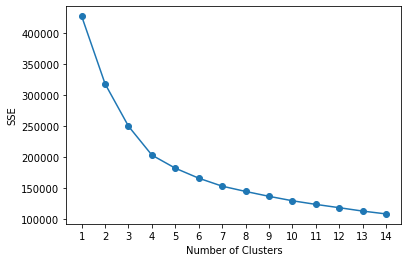

In [50]:
SSE = []

for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, random_state = 32)
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 15), SSE, marker='o')
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
model = KMeans(n_clusters=4)
model.fit(newdf)

KMeans(n_clusters=4)

In [52]:
segmentation.dropna(inplace = True)
segmentation

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,36.001186,25.0,2.0,1.0,0,1
1,20.051667,61.0,40.0,39.0,1,0
2,34.551230,23.0,104.0,29.0,1,0
3,25.851492,73.0,3.0,0.0,1,0
4,37.451142,24.0,4.0,0.0,0,0
...,...,...,...,...,...,...
135013,30.201361,32.0,3.0,1.0,1,0
135015,28.751405,61.0,1.0,0.0,1,0
135016,24.401536,43.0,31.0,8.0,1,0
135017,28.751405,38.0,16.0,2.0,1,0


In [53]:
segmentation['cluster'] = model.labels_

In [54]:
segmentation

,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user,cluster
0,36.001186,25.0,2.0,1.0,0,1,1
1,20.051667,61.0,40.0,39.0,1,0,3
2,34.551230,23.0,104.0,29.0,1,0,1
3,25.851492,73.0,3.0,0.0,1,0,3
4,37.451142,24.0,4.0,0.0,0,0,1
...,...,...,...,...,...,...,...
135013,30.201361,32.0,3.0,1.0,1,0,0
135015,28.751405,61.0,1.0,0.0,1,0,3
135016,24.401536,43.0,31.0,8.0,1,0,0
135017,28.751405,38.0,16.0,2.0,1,0,0


In [55]:
segmentation.cluster.value_counts()

0    38191
3    37108
1    21381
2    14190
Name: cluster, dtype: int64

In [56]:
avg_df = segmentation.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,weekly_consumption_hour,age,app_opens,num_series_started,Female,trial_user
0,0,26.113077,33.417507,14.791862,4.559975,0.980938,0.347752
1,1,34.691200,44.733221,17.348581,5.733642,0.548571,0.361489
2,2,28.171990,49.231456,146.615222,48.115997,0.868710,0.505215
3,3,25.910056,57.776672,14.363372,4.246739,0.977498,0.579498


In [57]:
df2 = pd.DataFrame(segmentation.groupby(['cluster','Female'])['Female'].count())
df2

Female
cluster Female        
0       0          728
        1        37463
1       0         9652
        1        11729
2       0         1863
        1        12327
3       0          835
        1        36273

In [58]:
df1 = pd.DataFrame(segmentation.groupby(['cluster','trial_user'])['trial_user'].count())
df1

trial_user
cluster trial_user            
0       0                24910
        1                13281
1       0                13652
        1                 7729
2       0                 7021
        1                 7169
3       0                15604
        1                21504

## 2. Attribution and Allocation

In [59]:
df_spend = pd.read_excel('advertising_spend_data.xlsx')
df_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [60]:
new = df['account_creation_date'].str.split(" ", expand = True)
date = new[0].str.split("-",expand = True)[0] + new[0].str.split("-",expand=True)[1]
df['date'] = date

In [61]:
df_channel = pd.DataFrame(df.groupby(['attribution_technical','date'])['attribution_technical'].count())
df_channel

attribution_technical
attribution_technical date                         
affiliate             201906                     78
                      201907                    839
                      201908                   1903
                      201909                   1065
                      201910                    760
...                                             ...
youtube               201911                     47
                      201912                     76
                      202001                    370
                      202002                    205
                      202003                    178

[253 rows x 1 columns]

In [62]:
# 'facebook', 'email', 'search', 'brand sem intent google',
# 'affiliate', 'email_blast', 'pinterest', 'referral'

In [63]:
fb_list = df_channel['attribution_technical']['facebook'].tolist()
email_list = df_channel['attribution_technical']['email'].tolist()
search_list =df_channel['attribution_technical']['search'].tolist()
brand_sem_intent_google_list = df_channel['attribution_technical']['brand sem intent google'].tolist()
affiliate_list = df_channel['attribution_technical']['affiliate'].tolist()
email_blast_list = df_channel['attribution_technical']['email_blast'].tolist()
pinterest_list =df_channel['attribution_technical']['pinterest'].tolist()
referral_list =df_channel['attribution_technical']['referral'].tolist()




In [64]:
cac =  pd.DataFrame(df_spend['date'])
cac

,date
0,2019-06-30
1,2019-07-31
2,2019-08-31
3,2019-09-30
4,2019-10-31
5,2019-11-30
6,2019-12-31
7,2020-01-31
8,2020-02-29
9,2020-03-31


In [65]:
cac['facebook'] = df_spend['facebook']/fb_list
cac['email'] = df_spend['email']/email_list
cac['search'] = df_spend['search']/search_list
cac['brand sem intent google'] = df_spend['brand sem intent google']/brand_sem_intent_google_list
cac['affiliate'] = df_spend['affiliate']/affiliate_list
cac['email_blast'] = df_spend['email_blast']/email_blast_list
cac['pinterest'] = df_spend['pinterest']/pinterest_list
cac['referral'] = df_spend['referral']/referral_list
cac


,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,64.339909,242.718447,160.185185,108.629442,152.564103,96.330275,159.459459,277.272727
1,2019-07-31,5.993407,23.190184,13.027108,10.191388,14.302741,19.735099,7.566204,12.500000
2,2019-08-31,5.306951,24.611902,9.334709,11.240106,8.565423,34.647739,9.733124,13.051823
3,2019-09-30,7.994779,31.322314,10.205184,13.921569,15.399061,46.586599,11.605416,12.714777
4,2019-10-31,5.406260,32.971800,9.001286,13.358302,16.052632,33.060389,9.824047,13.799622
5,2019-11-30,4.317045,29.373065,8.525896,10.640394,22.986248,15.580286,10.606061,12.436116
6,2019-12-31,5.534022,28.427344,8.514589,9.087188,21.415929,8.515815,8.460635,12.012012
7,2020-01-31,7.791382,31.883446,8.249448,8.644326,13.314711,8.571429,8.180708,12.671233
8,2020-02-29,6.221833,24.179293,7.000000,9.249787,10.135135,4.545455,9.411765,11.149228
9,2020-03-31,7.127304,22.241232,7.339153,12.011331,10.857495,5.357143,12.967033,17.605634


In [66]:
minValue = cac.min(axis=1)


In [67]:
minChannel = cac.idxmin()
minChannel

date                       0
facebook                   5
email                      9
search                     8
brand sem intent google    7
affiliate                  2
email_blast                8
pinterest                  1
referral                   8
dtype: int64

In [68]:
fb_list

[1318, 10011, 9855, 6129, 9489, 12995, 9288, 6289, 7988, 6889]

In [69]:
email_list

[309, 3260, 3092, 2420, 2305, 2584, 2677, 2368, 3168, 3507]

In [70]:
search_list

[108, 1328, 1939, 1852, 2333, 2510, 3770, 4073, 4300, 3093]

In [71]:
brand_sem_intent_google_list

[197, 2090, 1895, 1530, 1602, 2030, 2443, 2626, 2346, 1765]

In [72]:
affiliate_list

[78, 839, 1903, 1065, 760, 509, 565, 1074, 1480, 1621]

In [73]:
email_blast_list

[109, 1510, 1902, 1582, 977, 629, 411, 35, 66, 56]

In [74]:
pinterest_list

[37, 793, 637, 517, 682, 594, 851, 819, 680, 455]

In [75]:
referral_list

[22, 528, 521, 582, 529, 587, 666, 584, 583, 568]

## 3. churn

In [76]:
df = pd.read_csv("subscribers.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df['weekly_consumption_hour'] = df['weekly_consumption_hour'].fillna(0)
df['cancel_date'] = df['cancel_date'].fillna(-999)

In [77]:
df.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [78]:
df.trial_completed.value_counts()

True     200236
False     27392
Name: trial_completed, dtype: int64

In [79]:
filt_sub = (df['payment_period']!= 0)
df_churn = df.loc[filt_sub]

filt_trial = (df['payment_period']== 0)
df_trial = df.loc[filt_trial]


In [80]:
df_trial.trial_completed.value_counts()

True     68268
False    27123
Name: trial_completed, dtype: int64

In [81]:
df_trial.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [82]:
df_trial.num_trial_days.value_counts()

14    95311
0        80
Name: num_trial_days, dtype: int64

In [106]:
df_churn

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,country,attribution_survey,months_per_bill_period,monthly_price,discount_price,...,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT
0,21724479,0.0,0.000000,0.0,0.0,UAE,facebook,4,4.7343,4.5141,...,0,0,1,1,0,0,0,0,0,0
1,23383224,0.0,22.951579,0.0,70.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,1,0,0,0,0,0,0
4,26723159,4.0,22.951579,3.0,28.0,UAE,youtube,4,4.7343,4.5141,...,0,0,0,0,0,0,0,0,1,0
5,24810928,0.0,20.051667,0.0,70.0,UAE,tv,4,4.7343,4.5141,...,0,1,0,1,0,0,0,0,0,0
6,29726122,2.0,20.051667,2.0,61.0,UAE,search,4,4.7343,4.5141,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,2.0,24.401536,2.0,43.0,UAE,pinterest,4,4.7343,4.5141,...,0,0,0,1,0,0,0,0,0,0
227623,21434712,3.0,28.751405,2.0,38.0,UAE,facebook_organic,4,4.7343,4.5141,...,0,0,0,0,0,0,0,0,0,1
227624,25843074,2.0,27.301448,2.0,49.0,UAE,referral,4,4.7343,4.5141,...,1,0,0,0,0,0,0,0,1,0
227625,24799085,0.0,31.651317,0.0,45.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,1,0,0,0,0,0,0


In [104]:
df_churn.churn.value_counts()

0    121400
1     10837
Name: churn, dtype: int64

In [107]:
filt_churn = (df_churn['churn']== 1)
true_churner = df_churn.loc[filt_churn]

In [108]:
true_churner

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,country,attribution_survey,months_per_bill_period,monthly_price,discount_price,...,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT
10,21191741,0.0,34.551230,0.0,53.0,UAE,public_radio,4,4.7343,4.5141,...,0,0,1,0,0,0,1,0,0,0
43,21963354,0.0,25.851492,0.0,80.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,1,0,0,0,0,0,0
65,26752601,2.0,22.951579,2.0,56.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,0,0,0,0,1,0,0
104,28078576,3.0,30.201361,2.0,42.0,UAE,facebook,4,4.7343,4.5141,...,1,0,0,0,1,0,0,0,0,0
137,23617342,4.0,33.101274,2.0,56.0,UAE,facebook,4,4.7343,4.5141,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227472,20091322,2.0,18.601711,2.0,40.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,0,0,0,0,0,0,1
227498,25306093,2.0,27.301448,2.0,55.0,UAE,public_radio,4,4.7343,4.5141,...,1,0,0,1,0,0,0,0,0,0
227521,26287727,3.0,22.951579,2.0,32.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,0,0,0,0,0,1,0
227549,29515238,0.0,27.301448,0.0,37.0,UAE,facebook,4,4.7343,4.5141,...,0,0,0,1,0,0,0,0,0,0


In [113]:
true_churner.Female.value_counts(1)

1    0.90717
0    0.09283
Name: Female, dtype: float64

In [112]:
true_churner.weekly_consumption_hour.mean()

23.949384542407067

In [114]:
true_churner.age.mean()

39.17656292525858

In [115]:
true_churner.num_weekly_services_utilized.value_counts()

0.0    5058
3.0    3406
2.0    1223
4.0     992
5.0     154
6.0       2
7.0       1
1.0       1
Name: num_weekly_services_utilized, dtype: int64

In [117]:
true_churner.num_weekly_services_utilized.mean()

1.6076404909107687

In [118]:
true_churner.num_ideal_streaming_services.mean()

1.0718833625542123

In [119]:
true_churner.columns 

Index(['subid', 'num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'country', 'attribution_survey',
       'months_per_bill_period', 'monthly_price', 'discount_price',
       'account_creation_date', 'trial_end_date', 'join_fee', 'language',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'Female', 'churn', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'op_sys_Android', 'op_sys_iOS',
       'plan_type_base_uae_14_day_trial',
       'plan_type_base_uae_no_trial_7_day_guarantee',
       'plan_type_high_aud_14_day_trial', 'plan_type_high_jpy_14_day_trial',
       'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial',
       'plan_type_low_gbp_14_day_trial', 'plan_type_l

In [120]:
true_churner.payment_period.value_counts()

1    10183
2      654
Name: payment_period, dtype: int64

In [121]:
true_churner.payment_period.value_counts(1)

1    0.939651
2    0.060349
Name: payment_period, dtype: float64

In [ ]:
#'plan_type_base_uae_14_day_trial',
#       'plan_type_base_uae_no_trial_7_day_guarantee',
#       'plan_type_high_aud_14_day_trial', 'plan_type_high_jpy_14_day_trial',
#       'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial',
#       'plan_type_low_gbp_14_day_trial', 'plan_type_low_sar_no_trial',
#       'plan_type_low_uae_no_trial', 'initial_credit_card_declined_True',
#       'trial_completed_True',

In [122]:
true_churner.plan_type_base_uae_14_day_trial.value_counts()

1    10756
0       81
Name: plan_type_base_uae_14_day_trial, dtype: int64

In [123]:
true_churner.plan_type_base_uae_no_trial_7_day_guarantee.value_counts()

0    10837
Name: plan_type_base_uae_no_trial_7_day_guarantee, dtype: int64

In [124]:
true_churner.plan_type_high_aud_14_day_trial.value_counts()

0    10837
Name: plan_type_high_aud_14_day_trial, dtype: int64

In [125]:
true_churner.plan_type_high_sar_14_day_trial.value_counts()

0    10836
1        1
Name: plan_type_high_sar_14_day_trial, dtype: int64

In [126]:
true_churner.plan_type_low_gbp_14_day_trial.value_counts()

0    10837
Name: plan_type_low_gbp_14_day_trial, dtype: int64

In [127]:
true_churner.plan_type_low_uae_no_trial.value_counts()

0    10794
1       43
Name: plan_type_low_uae_no_trial, dtype: int64

In [128]:
true_churner.trial_completed_True.value_counts()

1    10568
0      269
Name: trial_completed_True, dtype: int64

In [83]:
filt_sub = (df['payment_period']!= 0)
df_churn = df.loc[filt_sub]

df_churn['age'] = df_churn['age'].apply(age_correct)

df_churn = pd.get_dummies(df_churn, columns = ['male_TF'],
                              dummy_na = False)
df_churn.drop(columns = ['male_TF_True'], axis=1, inplace=True)
df_churn = df_churn.rename(columns = {'male_TF_False':'Female'})

# define churn: discontinue subscriptions 
churn_list = []
for i in df_churn.index:
    if (df_churn.loc[i,'cancel_date']!= -999)|(df_churn.loc[i,'current_sub_TF']== False):
        churn_list.append(1)
    else:
        churn_list.append(0)
        
df_churn['churn']=churn_list
df_churn= df_churn.fillna(0)

df_churn = pd.get_dummies(df_churn,columns = ["package_type","preferred_genre","op_sys","plan_type",
                                              "initial_credit_card_declined","trial_completed",
                                              "attribution_technical",'payment_type','intended_use'
                                             ],drop_first = True)

df_train, df_test = model_selection.train_test_split(df_churn, 
                                                     test_size=0.3,
                                                     random_state = 32)

<ipython-input-83-a57d0137acdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['age'] = df_churn['age'].apply(age_correct)


In [84]:
df_churn.trial_completed_True.value_counts()

1    131968
0       269
Name: trial_completed_True, dtype: int64

In [85]:
df_churn.columns

Index(['subid', 'num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'country', 'attribution_survey',
       'months_per_bill_period', 'monthly_price', 'discount_price',
       'account_creation_date', 'trial_end_date', 'join_fee', 'language',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'Female', 'churn', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'op_sys_Android', 'op_sys_iOS',
       'plan_type_base_uae_14_day_trial',
       'plan_type_base_uae_no_trial_7_day_guarantee',
       'plan_type_high_aud_14_day_trial', 'plan_type_high_jpy_14_day_trial',
       'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial',
       'plan_type_low_gbp_14_day_trial', 'plan_type_l

In [86]:
y_col_name = 'churn'
x_col_name = ['num_weekly_services_utilized', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'discount_price',
        'payment_period', 'Female', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'op_sys_Android', 'op_sys_iOS',
       'initial_credit_card_declined_True',
       'trial_completed_True', 'attribution_technical_appstore',
       'attribution_technical_bing', 'attribution_technical_bing_organic',
       'attribution_technical_brand sem intent bing',
       'attribution_technical_brand sem intent google',
       'attribution_technical_content_greatist',
       'attribution_technical_criteo', 'attribution_technical_direct_mail',
       'attribution_technical_discovery', 'attribution_technical_display',
       'attribution_technical_email', 'attribution_technical_email_blast',
       'attribution_technical_facebook',
       'attribution_technical_facebook_organic',
       'attribution_technical_google_organic',
       'attribution_technical_influencer', 'attribution_technical_internal',
       'attribution_technical_organic', 'attribution_technical_other',
       'attribution_technical_ott', 'attribution_technical_pinterest',
       'attribution_technical_pinterest_organic',
       'attribution_technical_playstore', 'attribution_technical_podcast',
       'attribution_technical_quora', 'attribution_technical_referral',
       'attribution_technical_samsung', 'attribution_technical_search',
       'attribution_technical_tv', 'attribution_technical_twitter',
       'attribution_technical_vod', 'attribution_technical_youtube',
       'payment_type_Apple Pay', 'payment_type_CBD', 'payment_type_Najim',
       'payment_type_Paypal', 'payment_type_RAKBANK',
       'payment_type_Standard Charter',
       'intended_use_access to exclusive content', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT']
add_constant_TF = True

In [87]:
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LINEAR MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LINEAR MODEL FITTING

                                 OLS Regression Results                                
Dep. Variable:                  churn   R-squared (uncentered):                   0.322
Model:                            OLS   Adj. R-squared (uncentered):              0.321
Method:                 Least Squares   F-statistic:                              685.8
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:09:01   Log-Likelihood:                          2679.0
No. Observations:               92565   AIC:                                     -5230.
Df Residuals:                   92501   BIC:                                     -4626.
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
                                                    coef    std err          t      P>

In [88]:
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

         Current function value: 0.161834
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                92565
Model:                          Logit   Df Residuals:                    92501
Method:                           MLE   Df Model:                           63
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.4269
Time:                        22:09:03   Log-Likelihood:                -14980.
converged:                      False   LL-Null:                       -26137.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
num_weekly_services_utilized                     -0.8200      0.033    -24.569      0.000      -0.885      -0.755
weekly_consumption_hour   

In [89]:
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

<ipython-input-89-961097a4da05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
<ipython-input-89-961097a4da05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])


In [90]:
def get_gini_info(actual, pred_prob):
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [91]:
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn'], df_test['prob_churn_lpm'])

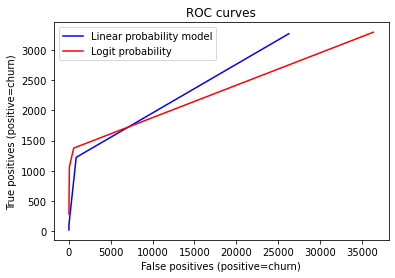

In [92]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])


In [93]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = df

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [94]:
df_churn['discount_price'].value_counts()

4.5141    131919
5.0279       214
1.0276        88
4.2205         7
4.0737         3
4.4407         2
4.3673         2
0.7707         1
3.7801         1
Name: discount_price, dtype: int64

In [95]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.4
threshold = 0.5
base_price = 5.0279
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [96]:
df_test['random_draws'] = np.random.random(df_test.shape[0])

<ipython-input-96-8e7cc05bd4f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['random_draws'] = np.random.random(df_test.shape[0])


In [97]:
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

<ipython-input-93-31439c8c0bd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['price_no_offer'] = base_price
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [98]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

<ipython-input-93-31439c8c0bd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['price_no_offer'] = base_price
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [99]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

<ipython-input-93-31439c8c0bd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['price_no_offer'] = base_price
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [100]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

<ipython-input-93-31439c8c0bd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['price_no_offer'] = base_price
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

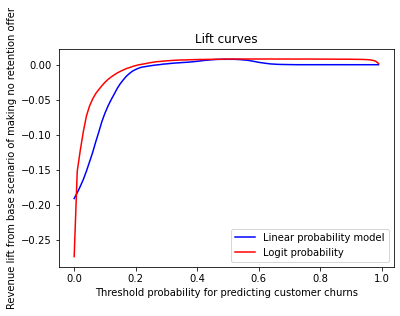

In [101]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


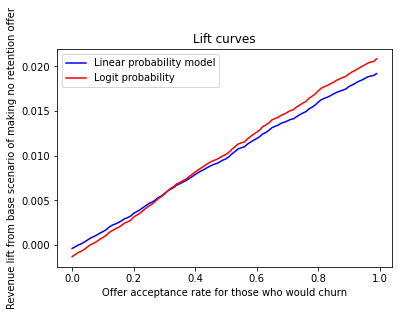

In [102]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])


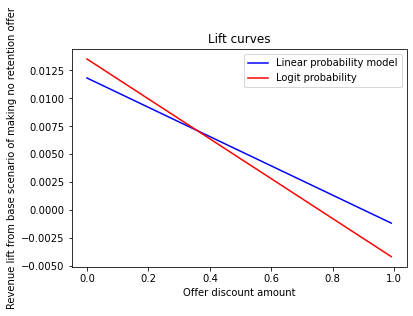

In [103]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
